In [34]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [20]:
dataset_path = os.getcwd()
dataset_path += "\\A_Z Handwritten Data.csv"
dataset_path_path = os.path.abspath(dataset_path)

df = pd.read_csv(dataset_path)

In [21]:
class_column = df['0']
class_column_letters = class_column.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
del df['0']

### DATA VISUALIZATION

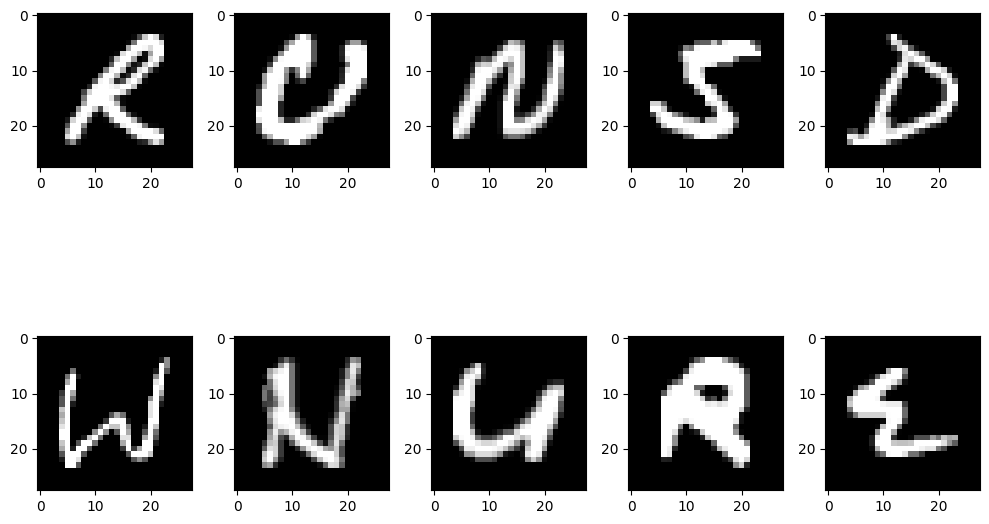

In [22]:
X_data = np.array(df.sample(10))
X_data = X_data.reshape(-1,28,28,1)

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

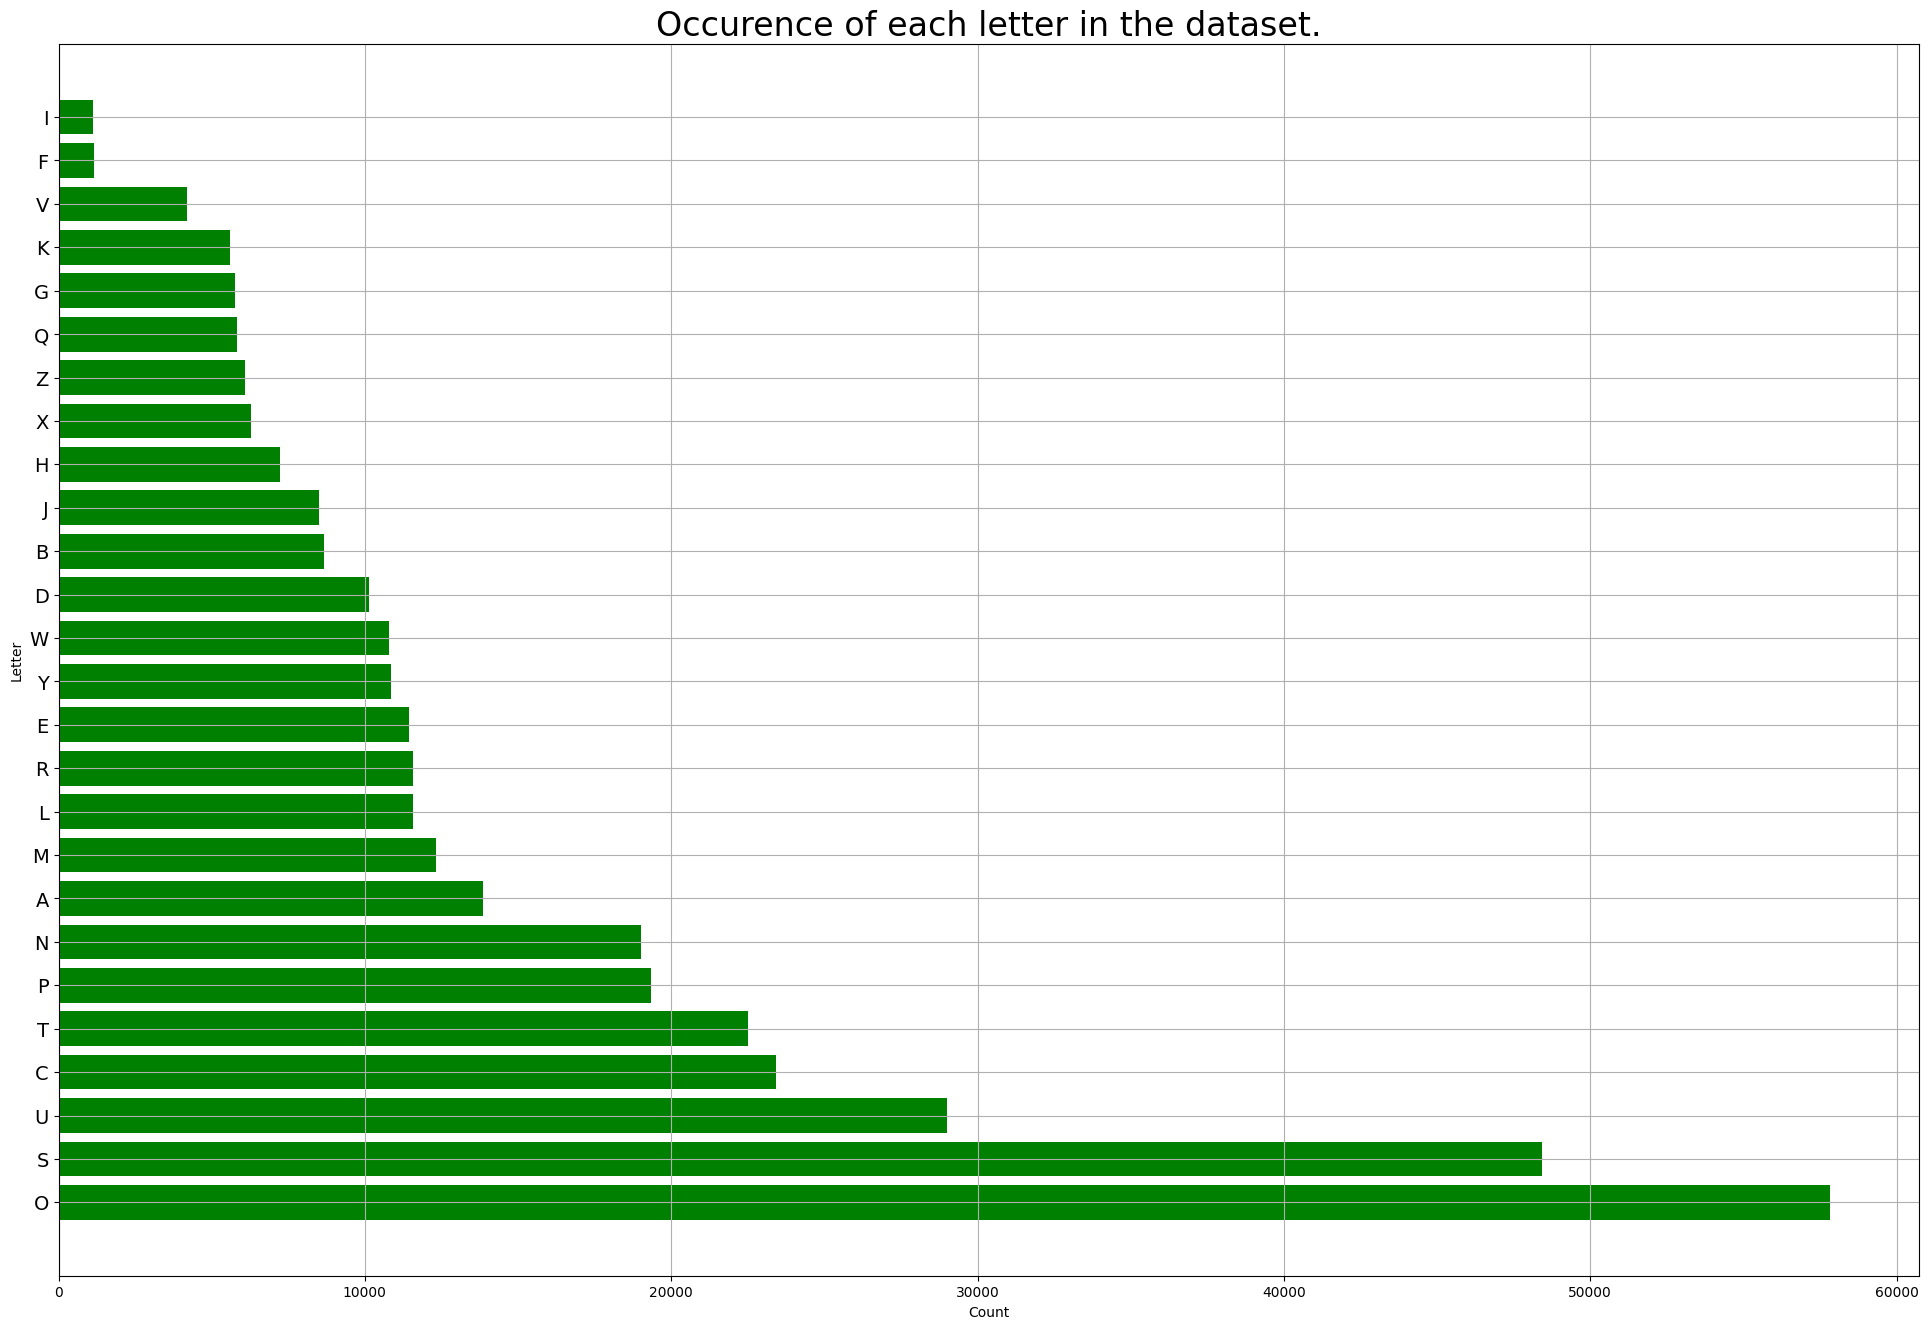

In [23]:
alphabet = ['O', 'S', 'U', 'C' , 'T' , 'P' , 'N', 'A', 'M', 'L', 'R', 'E', 'Y', 'W', 'D', 'B', 'J', 'H', 'X', 'Z', 'Q', 'G', 'K', 'V', 'F', 'I']
counts = class_column_letters.value_counts()

fig, ax = plt.subplots(1, 1, figsize=(24, 16))
ax.barh(alphabet, counts, color='green',)

plt.xlabel('Count')
plt.ylabel('Letter')
plt.yticks(fontsize=14)
plt.title('Occurence of each letter in the dataset.', fontsize=24)
plt.grid()
plt.show()

In [24]:
X = df.values
y = class_column.values

# Reshape the features to 2D images
X = X.reshape(-1, 28, 28, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

### CREATING FIRST MODEL

In [30]:
model = Sequential()

model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=130, validation_data=(X_test, y_test))

Epoch 1/10
1863/1863 [==============================] - 105s 54ms/step - loss: 0.5311 - accuracy: 0.8605 - val_loss: 0.1399 - val_accuracy: 0.9590
Epoch 2/10
1863/1863 [==============================] - 125s 67ms/step - loss: 0.1598 - accuracy: 0.9544 - val_loss: 0.0994 - val_accuracy: 0.9709
Epoch 3/10
1863/1863 [==============================] - 128s 69ms/step - loss: 0.1223 - accuracy: 0.9654 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 4/10
1863/1863 [==============================] - 107s 57ms/step - loss: 0.1027 - accuracy: 0.9709 - val_loss: 0.0666 - val_accuracy: 0.9814
Epoch 5/10
1863/1863 [==============================] - 110s 59ms/step - loss: 0.0909 - accuracy: 0.9742 - val_loss: 0.0622 - val_accuracy: 0.9827
Epoch 6/10
1863/1863 [==============================] - 109s 59ms/step - loss: 0.0813 - accuracy: 0.9766 - val_loss: 0.0606 - val_accuracy: 0.9833
Epoch 7/10
1863/1863 [==============================] - 115s 62ms/step - loss: 0.0745 - accuracy: 0.9785 - val_loss: 0

In [32]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

4074/4074 [==============================] - 23s 5ms/step - loss: 0.0533 - accuracy: 0.9860
Test Loss: 0.0533
Test Accuracy: 0.9860


### CREATING SECOND MODEL

In [36]:
model2 = Sequential()

model2.add(Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (4, 4), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))

model2.add(Dense(26, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model2.fit(X_train, y_train, epochs=10, batch_size=130, validation_data=(X_test, y_test))

Epoch 1/10
1863/1863 [==============================] - 122s 63ms/step - loss: 0.2829 - accuracy: 0.9348 - val_loss: 0.0895 - val_accuracy: 0.9752
Epoch 2/10
1863/1863 [==============================] - 117s 63ms/step - loss: 0.0781 - accuracy: 0.9776 - val_loss: 0.0711 - val_accuracy: 0.9800
Epoch 3/10
1863/1863 [==============================] - 129s 69ms/step - loss: 0.0594 - accuracy: 0.9827 - val_loss: 0.0647 - val_accuracy: 0.9819
Epoch 4/10
1863/1863 [==============================] - 124s 67ms/step - loss: 0.0499 - accuracy: 0.9853 - val_loss: 0.0558 - val_accuracy: 0.9851
Epoch 5/10
1863/1863 [==============================] - 121s 65ms/step - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.0488 - val_accuracy: 0.9870
Epoch 6/10
1863/1863 [==============================] - 117s 63ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0496 - val_accuracy: 0.9872
Epoch 7/10
1863/1863 [==============================] - 126s 68ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0

In [38]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

4074/4074 [==============================] - 30s 7ms/step - loss: 0.0445 - accuracy: 0.9899
Test Loss: 0.0445
Test Accuracy: 0.9899


In [39]:
#model2.save("High_accuracy_model.h5")